Dataset saved as maybach_uk_sales_profit_data.csv


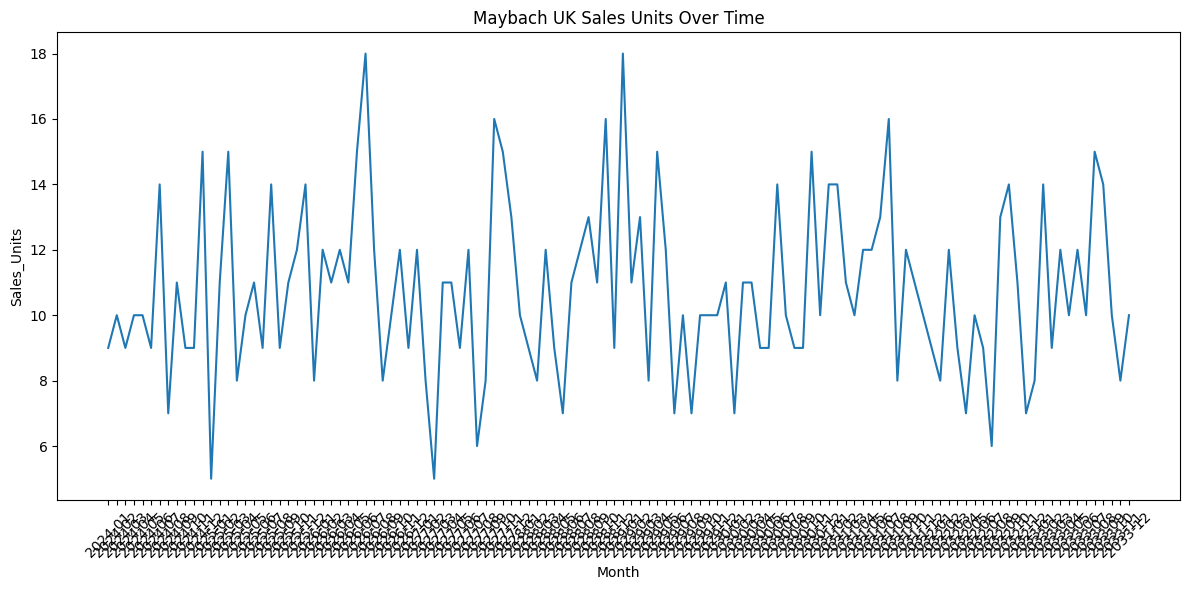

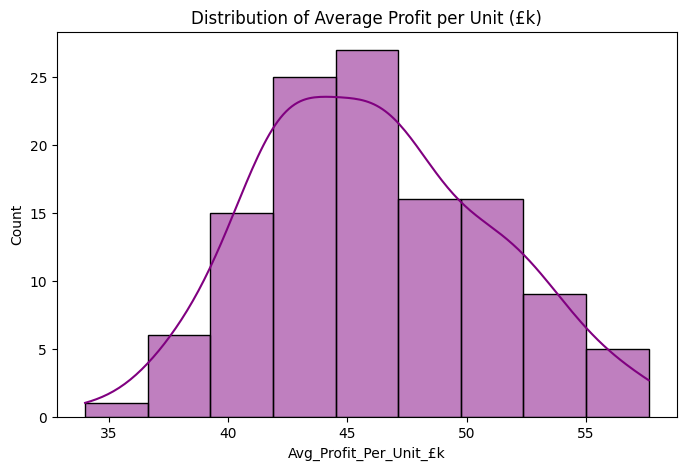

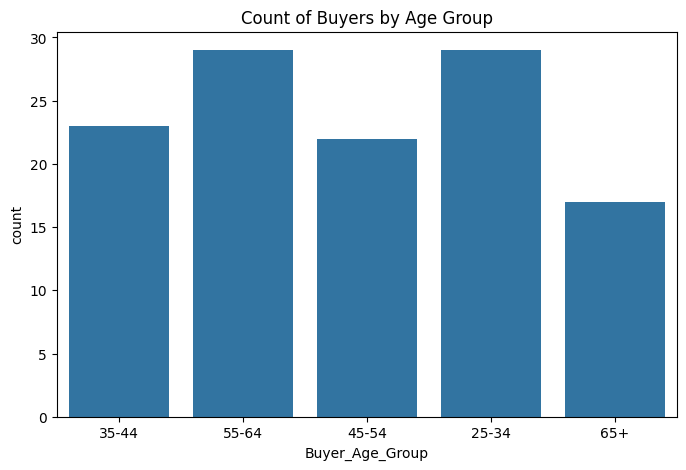

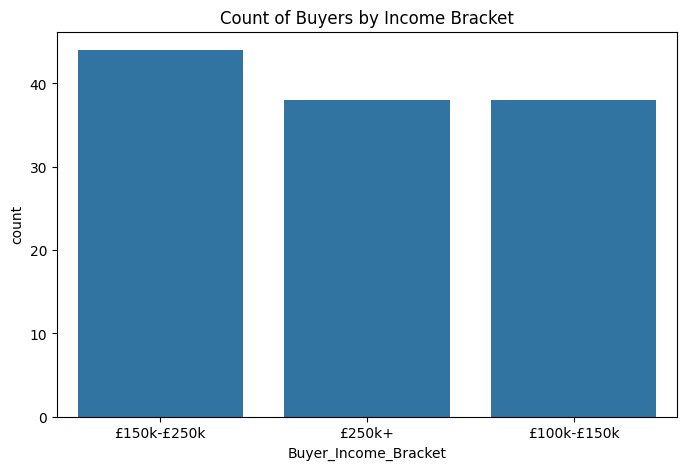

In [1]:
# %% [markdown]
# # Maybach UK Sales, Profit, and Demographics Dataset
# This notebook prepares a structured dataset for Maybach sales in the UK.
# Since public UK-specific Maybach data is limited, we use example synthetic data
# and show how to load, analyze, and export it.

# %% [markdown]
# ## 📌 Step 1 — Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
# ## 📌 Step 2 — Create Synthetic / Example Data
# In practice, replace this with actual sales and profit figures from sources
# such as SMMT data, Mercedes‑Benz UK, or proprietary industry datasets.

# %%
np.random.seed(42)

# Example sample size
n_samples = 120

# Generate sample months
months = pd.date_range(start="2024-01-01", periods=n_samples, freq='MS').strftime('%Y-%m')

# Sales units (synthetic): volumes remain low (luxury cars)
sales_units = np.random.poisson(lam=8, size=n_samples) + 3

# Avg profit per car (£ thousands) — typical high margins for luxury vehicles
# Note: Mercedes‑Maybach models are ultra‑premium and carry high profit margins.
avg_profit = np.random.normal(loc=45, scale=5, size=n_samples)  # £k per unit

# Demographic: Age groups (sampled)
age_groups = np.random.choice(['25-34','35-44','45-54','55-64','65+'], size=n_samples)

# Demographic: Annual income bracket (£)
income_brackets = np.random.choice(['£100k-£150k','£150k-£250k','£250k+'], size=n_samples)

# Assemble DataFrame
df = pd.DataFrame({
    "Month": months,
    "Sales_Units": sales_units,
    "Avg_Profit_Per_Unit_£k": np.round(avg_profit, 2),
    "Buyer_Age_Group": age_groups,
    "Buyer_Income_Bracket": income_brackets
})

df.head()

# %% [markdown]
# ## 📌 Step 3 — Save Dataset to CSV

# %%
df.to_csv("maybach_uk_sales_profit_data.csv", index=False)
print("Dataset saved as maybach_uk_sales_profit_data.csv")

# %% [markdown]
# ## 📌 Step 4 — Summary Statistics

# %%
df.describe()

# %% [markdown]
# ## 📌 Step 5 — Visualize Sales Trend

# %%
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Month", y="Sales_Units")
plt.xticks(rotation=45)
plt.title("Maybach UK Sales Units Over Time")
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 📌 Step 6 — Profit Distribution

# %%
plt.figure(figsize=(8,5))
sns.histplot(df["Avg_Profit_Per_Unit_£k"], kde=True, color='purple')
plt.title("Distribution of Average Profit per Unit (£k)")
plt.show()

# %% [markdown]
# ## 📌 Step 7 — Demographic Breakdown

# %%
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Buyer_Age_Group")
plt.title("Count of Buyers by Age Group")
plt.show()

# %%
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Buyer_Income_Bracket")
plt.title("Count of Buyers by Income Bracket")
plt.show()

# %% [markdown]
# ## 📝 Notes for Real Data Integration
# To add real UK Maybach data:
#   - Replace the synthetic dataset creation above with actual imported data.
#   - Sources could be SMMT registration reports or Mercedes‑Benz UK internal sales.
#   - Profit margin per model can be calculated as (Selling Price − Cost) / Cost.
#   - Demographics might be obtained from customer surveys or CRM systems.